In [ ]:
!pip install keras -tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.7/240.7 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.7/347.7 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.5/87.5 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 23.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requi

In [ ]:
!pip install keras_tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.9 MB/s eta 0:00:00


In [ ]:
import cv2
import datetime
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow_hub as hub

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score

from tensorflow.keras import backend as K
from tensorflow.keras import layers
from tensorflow.keras import Model, Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#utility & processing
from tensorflow.keras import utils
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers

#callbacks
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

#data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator


#keras tuner
import keras_tuner
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

#warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install tensorflow-addons
import tensorflow_addons as tfa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 8.0 MB/s eta 0:00:00


In [ ]:
# https://drive.google.com/file/d/1Z80TFKr-LYCl4O5fZLxS-TtAJWfZlto_/view?usp=drive_link
!gdown 1Z80TFKr-LYCl4O5fZLxS-TtAJWfZlto_

Downloading...
From (original): https://drive.google.com/uc?id=1Z80TFKr-LYCl4O5fZLxS-TtAJWfZlto_
From (redirected): https://drive.google.com/uc?id=1Z80TFKr-LYCl4O5fZLxS-TtAJWfZlto_&confirm=t&uuid=3a79c76e-3fe7-4bc8-ade2-97610d467fb3
To: /content/herlev.zip
100% 42.6M/42.6M [00:00<00:00, 81.0MB/s]


In [ ]:
#unzip dataset
%%capture
!unzip herlev.zip;

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
for dirname, _, filenames in os.walk('/content/herlev'):
    print(dirname)

/content/herlev
/content/herlev/moderate_dysplastic
/content/herlev/carcinoma_in_situ
/content/herlev/light_dysplastic
/content/herlev/normal_intermediate
/content/herlev/severe_dysplastic
/content/herlev/normal_columnar
/content/herlev/normal_superficiel


In [ ]:
filenames = tf.io.gfile.glob('/content/herlev/*/*')
print(len(filenames))
filenames[:3]

917


['/content/herlev/moderate_dysplastic/153701139-153701158-004.BMP',
 '/content/herlev/moderate_dysplastic/149057812-149057847-002.BMP',
 '/content/herlev/moderate_dysplastic/149357849-149357857-003.BMP']

In [ ]:
data = pd.DataFrame()
for el in range(0, len(filenames)):
    target = filenames[el].split('/')[-2]
    path = filenames[el]

    data.loc[el, 'filename'] = path
    data.loc[el, 'class'] = target

print(data['class'].value_counts(dropna=False))
data

class
severe_dysplastic      197
light_dysplastic       182
carcinoma_in_situ      150
moderate_dysplastic    146
normal_columnar         98
normal_superficiel      74
normal_intermediate     70
Name: count, dtype: int64


,filename,class
0,/content/herlev/moderate_dysplastic/153701139-...,moderate_dysplastic
1,/content/herlev/moderate_dysplastic/149057812-...,moderate_dysplastic
2,/content/herlev/moderate_dysplastic/149357849-...,moderate_dysplastic
3,/content/herlev/moderate_dysplastic/149102510-...,moderate_dysplastic
4,/content/herlev/moderate_dysplastic/149315960-...,moderate_dysplastic
...,...,...
912,/content/herlev/normal_columnar/158986920-1589...,normal_columnar
913,/content/herlev/normal_columnar/157185730-1571...,normal_columnar
914,/content/herlev/normal_columnar/153958345-1539...,normal_columnar
915,/content/herlev/normal_columnar/153956040-1539...,normal_columnar


In [ ]:
data = shuffle(data, random_state=42)
data.reset_index(drop=True, inplace=True)
data

,filename,class
0,/content/herlev/severe_dysplastic/153655016-15...,severe_dysplastic
1,/content/herlev/moderate_dysplastic/149053341-...,moderate_dysplastic
2,/content/herlev/light_dysplastic/148500154-148...,light_dysplastic
3,/content/herlev/light_dysplastic/204871030-204...,light_dysplastic
4,/content/herlev/normal_superficiel/157224297-1...,normal_superficiel
...,...,...
912,/content/herlev/moderate_dysplastic/149058262-...,moderate_dysplastic
913,/content/herlev/carcinoma_in_situ/149314453-14...,carcinoma_in_situ
914,/content/herlev/normal_columnar/157227461-1572...,normal_columnar
915,/content/herlev/light_dysplastic/148498683-148...,light_dysplastic


In [ ]:
change = {
'severe_dysplastic' : '0',
'light_dysplastic': '1',
'carcinoma_in_situ' : '2',
'moderate_dysplastic' : '3',
'normal_columnar' : '4',
'normal_superficiel' : '5',
'normal_intermediate' : '6',
}

data['class'] = data['class'].map(change)
data

,filename,class
0,/content/herlev/severe_dysplastic/153655016-15...,0
1,/content/herlev/moderate_dysplastic/149053341-...,3
2,/content/herlev/light_dysplastic/148500154-148...,1
3,/content/herlev/light_dysplastic/204871030-204...,1
4,/content/herlev/normal_superficiel/157224297-1...,5
...,...,...
912,/content/herlev/moderate_dysplastic/149058262-...,3
913,/content/herlev/carcinoma_in_situ/149314453-14...,2
914,/content/herlev/normal_columnar/157227461-1572...,4
915,/content/herlev/light_dysplastic/148498683-148...,1


In [ ]:
indexes=[]

def func(x):
    if x[-4:] != '.BMP':
        idx = data[data['filename'] == x].index
        indexes.append(idx[0])
        print(idx[0], x)
    return x

data['filename'].map(func)

print(data.shape)
data.drop(index=indexes, axis=0, inplace=True)
data.reset_index(drop=True, inplace=True)
print(data.shape)

(917, 2)
(917, 2)


In [ ]:
for el in range(100, 120):
    path = data.loc[el, 'filename']
    img  = cv2.imread(path)
    print(img.shape)

(111, 89, 3)
(207, 230, 3)
(122, 107, 3)
(289, 252, 3)
(180, 262, 3)
(85, 106, 3)
(89, 60, 3)
(240, 308, 3)
(108, 130, 3)
(167, 161, 3)
(82, 57, 3)
(156, 194, 3)
(229, 162, 3)
(92, 70, 3)
(71, 84, 3)
(58, 162, 3)
(200, 303, 3)
(76, 118, 3)
(92, 81, 3)
(84, 124, 3)


In [ ]:
BATCH_SIZE = 32
EPOCHS = 50
IM_HEIGHT = 224
IM_WIDTH = 224

AUTOTUNE = tf.data.experimental.AUTOTUNE

tf.random.set_seed(999)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Menghapus baris dengan nilai NaN pada kolom 'class'
data_cleaned = data.dropna(subset=['class'])

# Melakukan split data menjadi train dan test set
train_data, test_data = train_test_split(data_cleaned, test_size=0.2, random_state=42, stratify=data_cleaned['class'])

print(train_data['class'].value_counts(dropna=False))
print(test_data['class'].value_counts(dropna=False))


class
0    157
1    146
2    120
3    117
4     78
5     59
6     56
Name: count, dtype: int64
class
0    40
1    36
2    30
3    29
4    20
5    15
6    14
Name: count, dtype: int64


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

train_generator = train_datagen.flow_from_dataframe(
                  train_data,
                  x_col="filename",
                  y_col="class",
                  target_size=(IM_HEIGHT, IM_WIDTH),
                  class_mode='categorical',
                  batch_size= BATCH_SIZE,
                  color_mode='rgb',
                  shuffle=True,
                  num_parallel_calls=AUTOTUNE)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_dataframe(
                 test_data,
                 x_col="filename",
                 y_col="class",
                 target_size=(IM_HEIGHT, IM_WIDTH),
                 class_mode='categorical',
                 batch_size= BATCH_SIZE,
                 color_mode='rgb',
                 shuffle=False,
                 num_parallel_calls=AUTOTUNE)

Found 733 validated image filenames belonging to 7 classes.
Found 184 validated image filenames belonging to 7 classes.


In [ ]:
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IM_HEIGHT, IM_WIDTH, 3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D(2,2),


        tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
        tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
        tf.keras.layers.MaxPool2D(2,2),

        tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
        tf.keras.layers.MaxPool2D(2,2),

        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(7, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss = 'categorical_crossentropy',
                  metrics = 'accuracy')

    return model

model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 107, 107, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 32)        0

In [ ]:
init_time = datetime.datetime.now()


train_steps = train_generator.samples // BATCH_SIZE
valid_steps = test_generator.samples // BATCH_SIZE

early_stopping = EarlyStopping(monitor="val_loss", patience=8, mode="min")
checkpoint = ModelCheckpoint("loss-{val_loss:.4f}.h5", monitor="val_loss", verbose=0,
                             save_best_only=True, save_weights_only=True, mode="min")
learning_rate_reduction = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=4,
                                            min_lr=1e-7, verbose=1, mode="min")
history = model.fit(
    train_generator,
    validation_data=test_generator,
    batch_size=BATCH_SIZE,
    epochs=50,
    steps_per_epoch=train_steps,
    validation_steps=valid_steps,
    callbacks=[
                checkpoint,
                early_stopping,
                learning_rate_reduction],
    verbose=1,
    )
requared_time = datetime.datetime.now() - init_time
print(f'\nRequired time:  {str(requared_time)}\n')

Epoch 1/50
22/22 [==============================] - 20s 506ms/step - loss: 1.8065 - accuracy: 0.2910 - val_loss: 1.9320 - val_accuracy: 0.1000 - lr: 0.0010
Epoch 2/50
22/22 [==============================] - 11s 523ms/step - loss: 1.6572 - accuracy: 0.3267 - val_loss: 1.9277 - val_accuracy: 0.2188 - lr: 0.0010
Epoch 3/50
22/22 [==============================] - 9s 401ms/step - loss: 1.5587 - accuracy: 0.3709 - val_loss: 1.8878 - val_accuracy: 0.2250 - lr: 0.0010
Epoch 4/50
22/22 [==============================] - 8s 375ms/step - loss: 1.5113 - accuracy: 0.4094 - val_loss: 1.9269 - val_accuracy: 0.2250 - lr: 0.0010
Epoch 5/50
22/22 [==============================] - 10s 468ms/step - loss: 1.4819 - accuracy: 0.3966 - val_loss: 1.9212 - val_accuracy: 0.1500 - lr: 0.0010
Epoch 6/50
22/22 [==============================] - 9s 387ms/step - loss: 1.4075 - accuracy: 0.4465 - val_loss: 2.0237 - val_accuracy: 0.0938 - lr: 0.0010
Epoch 7/50
22/22 [==============================] - ETA: 0s - loss:

Minimum Loss: 0.8644
Minimum Validation Loss: 0.8746
Maksimum Accuracy: 0.6591
Maksimum Validation Accuracy: 0.6625


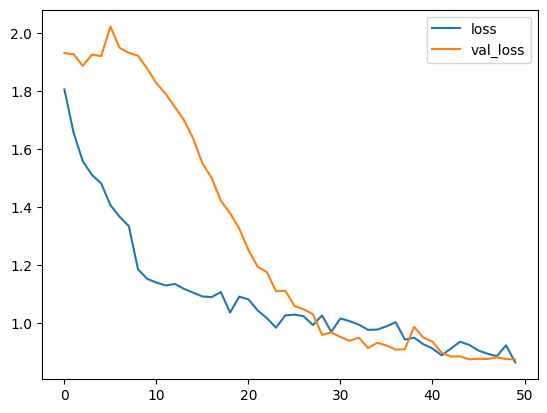

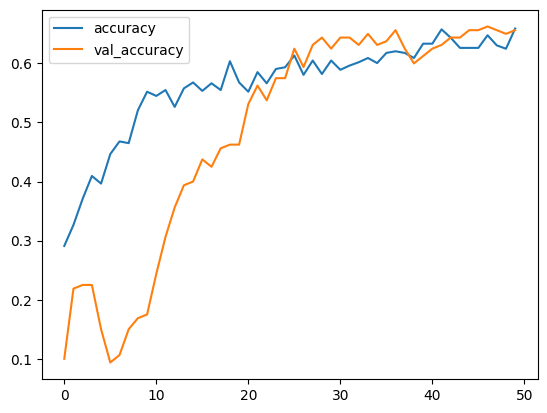

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print("Minimum Loss: {:0.4f}".format(history_df['loss'].min()));
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

history_df.loc[0:, ['accuracy', 'val_accuracy']].plot()
print("Maksimum Accuracy: {:0.4f}".format(history_df['accuracy'].max()));
print("Maksimum Validation Accuracy: {:0.4f}".format(history_df['val_accuracy'].max()));

In [ ]:
test_steps = test_generator.samples // BATCH_SIZE

test_loss, test_acc = model.evaluate(test_generator, steps=test_steps)
print('\naccuracy:', test_acc, 'loss: ',test_loss)

5/5 [==============================] - 0s 45ms/step - loss: 0.8746 - accuracy: 0.6562

accuracy: 0.65625 loss:  0.8745861053466797


In [ ]:
predict = model.predict(test_generator, steps=test_steps)
y_hat = np.argmax(predict, axis=1)
y_hat[:20]

5/5 [==============================] - 0s 35ms/step


array([2, 0, 1, 4, 0, 1, 1, 2, 0, 2, 6, 3, 0, 2, 1, 1, 1, 6, 3, 2])

In [ ]:
test_generator[0][0].shape

(32, 224, 224, 3)

In [ ]:
test_labels_df = pd.DataFrame()
test_labels_df[['class']] = test_data[['class']]

change = {
'0' : 0,
'1' : 1,
'2' : 2,
'3' : 3,
'4' : 4,
'5' : 5,
'6' : 6,
'7' : 7,
}

test_labels_df['class'] = test_labels_df['class'].map(change)
test_labels_df = test_labels_df[ : test_steps*BATCH_SIZE]


y_test = np.array(test_labels_df['class'])
y_test[:20]

array([2, 4, 2, 4, 0, 1, 1, 2, 0, 3, 6, 1, 0, 0, 1, 2, 1, 6, 0, 2])

              precision    recall  f1-score   support

           0       0.59      0.53      0.56        32
           1       0.65      0.76      0.70        34
           2       0.59      0.69      0.63        29
           3       0.54      0.54      0.54        24
           4       0.78      0.44      0.56        16
           5       0.91      0.83      0.87        12
           6       0.92      0.92      0.92        13

    accuracy                           0.66       160
   macro avg       0.71      0.67      0.68       160
weighted avg       0.66      0.66      0.65       160
 



<Axes: >

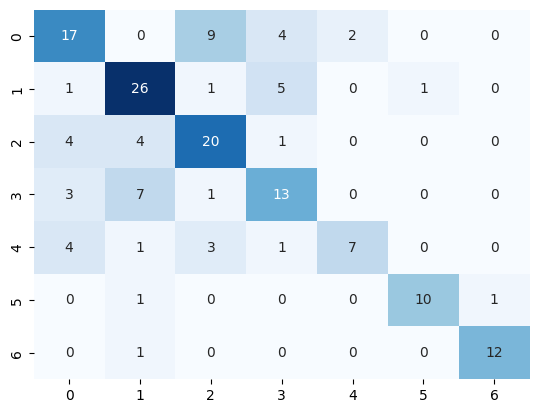

In [ ]:
print(classification_report(y_test, y_hat), '\n')
cm = confusion_matrix(y_test, y_hat)
sns.heatmap(cm, annot=True, cmap="Blues", fmt='.0f', cbar=False)

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

train_generator = train_datagen.flow_from_dataframe(
                  train_data,
                  x_col="filename",
                  y_col="class",
                  target_size=(IM_HEIGHT, IM_WIDTH),
                  class_mode='categorical',
                  # batch_size= BATCH_SIZE,
                  color_mode='rgb',
                  shuffle=False,
                  num_parallel_calls=AUTOTUNE)

Found 733 validated image filenames belonging to 7 classes.


In [ ]:
train_steps = train_generator.samples // BATCH_SIZE

y_train_pred_proba = model.predict(train_generator)
y_train_pred = np.argmax(y_train_pred_proba, axis=1)
y_train_true = train_generator.classes

23/23 [==============================] - 9s 411ms/step


In [ ]:
train_report = classification_report(y_train_true, y_train_pred)
print("Classification Report for Training Data:")
print(train_report)

Classification Report for Training Data:
              precision    recall  f1-score   support

           0       0.61      0.57      0.59       157
           1       0.67      0.74      0.70       146
           2       0.64      0.72      0.68       120
           3       0.57      0.42      0.48       117
           4       0.64      0.73      0.68        78
           5       0.91      0.85      0.88        59
           6       0.80      0.86      0.83        56

    accuracy                           0.67       733
   macro avg       0.69      0.70      0.69       733
weighted avg       0.66      0.67      0.66       733



In [ ]:
len(train_generator)

23

In [ ]:
train_steps = train_generator.samples // BATCH_SIZE

train_loss, train_acc = model.evaluate(train_generator, steps=train_steps)
print('\naccuracy:', test_acc, 'loss: ',test_loss)

22/22 [==============================] - 9s 419ms/step - loss: 0.8329 - accuracy: 0.6733

accuracy: 0.65625 loss:  0.8745861053466797
